In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from dowhy import gcm
from dowhy.gcm.shapley import ShapleyApproximationMethods, ShapleyConfig

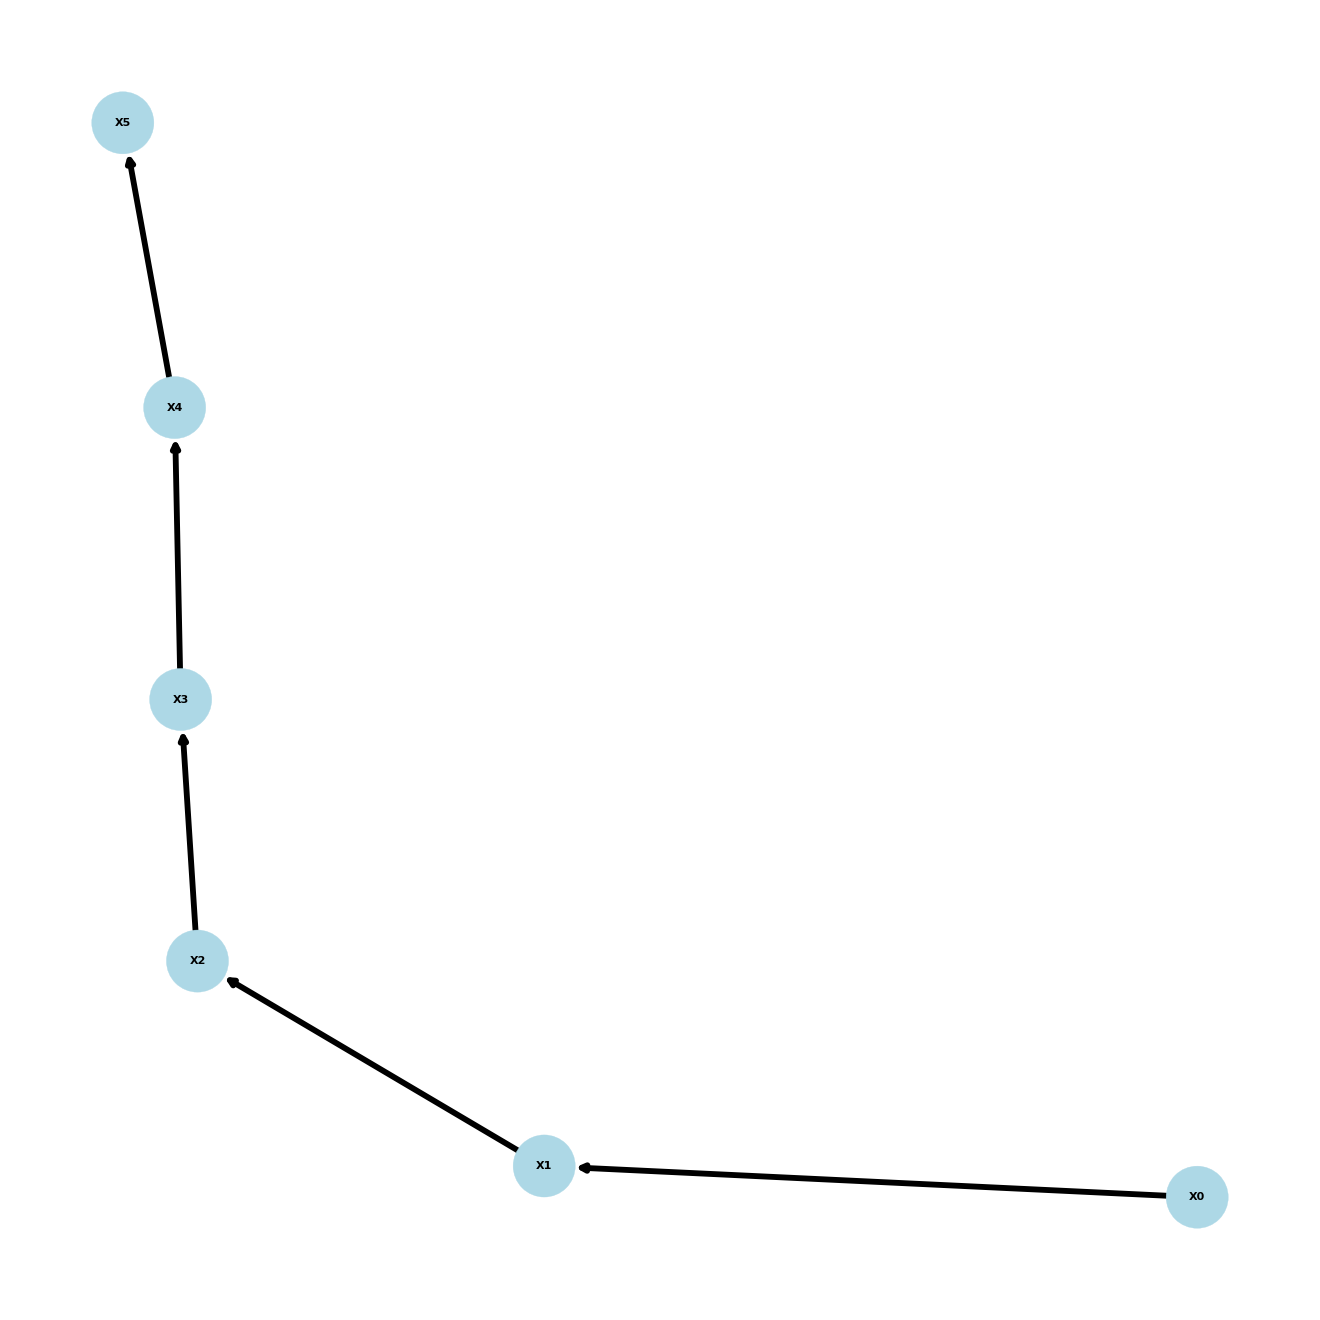

In [2]:
features = ('X0', 'X1', 'X2', 'X3', 'X4', 'X5')
nodes = [('X0', 'X1'), ('X1', 'X2'), ('X2', 'X3'), ('X3', 'X4'), ('X4', 'X5')]
causal_graph = nx.DiGraph(nodes)
gcm.util.plot(causal_graph, figure_size=[13, 13])

In [3]:
from scipy.stats import halfnorm

causal_model = gcm.StructuralCausalModel(causal_graph)

for node in causal_graph.nodes:
    if len(list(causal_graph.predecessors(node))) > 0:
        causal_model.set_causal_mechanism(node, gcm.AdditiveNoiseModel(gcm.ml.create_linear_regressor()))
    else:
        causal_model.set_causal_mechanism(node, gcm.ScipyDistribution(halfnorm))

In [4]:
n_samples = 100
normal_data = pd.DataFrame(np.random.randint(0,100,size=(n_samples, len(features))), 
                           columns=features)
normal_data.head()

,X0,X1,X2,X3,X4,X5
0,86,70,32,7,92,7
1,76,37,29,96,59,2
2,44,0,21,56,47,51
3,53,13,64,8,24,75
4,5,47,49,66,45,55


In [5]:
outlier_data = pd.DataFrame(np.random.randint(0,100,size=(1, len(features))), 
                           columns=features)
outlier_data['X5'] = 0.1
outlier_data.head()

,X0,X1,X2,X3,X4,X5
0,4,80,58,48,11,0.1


In [6]:
gcm.config.disable_progress_bars() # to disable print statements when computing Shapley values
shapley_config = ShapleyConfig(approximation_method=ShapleyApproximationMethods.SUBSET_SAMPLING)
median_attribs, uncertainty_attribs = gcm.confidence_intervals(
    gcm.fit_and_compute(gcm.attribute_anomalies,
                        causal_model,
                        normal_data,
                        target_node='X5',
                        anomaly_samples=outlier_data,
                        shapley_config=shapley_config),
    num_bootstrap_resamples=1)

Fitting emperical model
Fitting emperical model
Fitting emperical model
Fitting emperical model
Fitting emperical model
anomaly_scorer is <dowhy.gcm.anomaly_scorers.MedianCDFQuantileScorer object at 0x7fcef82c0460>
target_node X5
causal_model.graph DiGraph with 6 nodes and 5 edges
get_noise_dependent_function, NO approx_prediction_model
node_connected_subgraph_view(causal_model.graph, target_node)
DiGraph with 6 nodes and 5 edges
<class 'networkx.classes.digraph.DiGraph'>
the input to anomaly_scoring_func is [[  4.          20.73900031   8.07182468  -4.40413739 -37.08131302
  -58.93937066]]
compute anomaly scores of the outlier noise -- > anomaly_scores = anomaly_scoring_func(anomaly_samples)
---------------------------------------------------------
anomaly_scores of the outlier noise is [0.96]
distribution_samples which is noise samples is used to generate feature_samples
distribution_samples and all_subsets of nodes possible permutation are used as inputs to the permute_features func